## Build the PySpark Session ##

In [225]:
pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 32.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [227]:
# import pyspark
# from pyspark.sql import SparkSession
# from pyspark.sql import Column
import pyspark.pandas as ps



In [11]:
spark = SparkSession.builder.appName('practise').getOrCreate() 


In [39]:
import os 
from pyspark.sql.functions import col, split, trim, substring 
os.getcwd()

'/Users/supalertee/Projects/python_project/Seoul_analysis_docker/dags'

In [131]:
df_pyspark_pollution = spark.read.option('header','true').csv('AirPollutionSeoul/Measurement_summary.csv')
df_pyspark_bike = spark.read.option('header','true').csv('SeoulBikeData.csv')

In [161]:
df_pyspark_pollution = spark.read.csv('AirPollutionSeoul/Measurement_summary.csv', header= True, inferSchema= True)
df_pyspark_bike = spark.read.option('header','true').csv('SeoulBikeData.csv', header= True, inferSchema= True)

In [162]:
df_pyspark_pollution = df_pyspark_pollution.withColumn("Measurement date", substring(col("Measurement date"), 1, 10)).withColumn("Address", trim(split(col("Address"), ",").getItem(2))).toPandas()


In [204]:
df_pyspark_bike.drop(["Seasons","Holiday","Functioning Day"],axis = 1).groupby("Date").mean()

,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Date,,,,,,,,,,
2017-12-01,397.458333,11.5,-2.454167,45.875000,1.537500,1870.750000,-13.545833,0.248750,0.000000,0.000000
2017-12-02,355.125000,11.5,1.325000,61.958333,1.712500,1471.083333,-5.716667,0.263750,0.000000,0.000000
2017-12-03,300.916667,11.5,4.875000,81.541667,1.612500,455.750000,1.883333,0.125417,0.166667,0.000000
2017-12-04,363.708333,11.5,-0.304167,52.500000,3.450000,1362.833333,-9.925000,0.282917,0.004167,0.000000
2017-12-05,346.125000,11.5,-4.458333,36.416667,1.108333,1959.458333,-17.425000,0.035833,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2018-11-26,715.083333,11.5,6.320833,70.500000,1.029167,475.000000,0.845833,0.418750,0.000000,0.120833
2018-11-27,678.416667,11.5,7.066667,68.000000,1.350000,405.291667,1.000000,0.192500,0.000000,0.000000
2018-11-28,688.500000,11.5,5.304167,25.791667,1.695833,1429.083333,-13.350000,0.403333,0.000000,0.000000


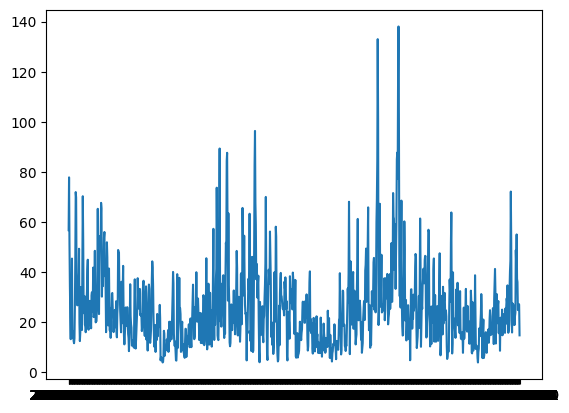

In [194]:
test = df_pyspark_pollution.drop(["Station code","Address","Latitude","Longitude"],axis = 1).groupby(["Measurement date"]).mean().reset_index()
plt.plot(test["Measurement date"],test["PM2.5"])

In [236]:
df_pyspark_pollution = spark.read.csv('AirPollutionSeoul/Measurement_summary.csv', header= True, inferSchema= True)
df_pyspark_bike = spark.read.option('header','true').csv('SeoulBikeData.csv', header= True, inferSchema= True)
df_pyspark_bike = df_pyspark_bike.toPandas()
df_pyspark_pollution = df_pyspark_pollution.withColumn("Measurement date", substring(col("Measurement date"), 1, 10)).withColumn("Address", trim(split(col("Address"), ",").getItem(2)))
df_pyspark_pollution = df_pyspark_pollution.toPandas()
i = 0
while i < len(df_pyspark_bike):
    decompose_temp = df_pyspark_bike["Date"][i].split("/")
    df_pyspark_bike.loc[i,"Date"] = decompose_temp[2]+ '-' + decompose_temp[1] + '-' + decompose_temp[0]
    i += 1
# visualization 
polution_time_series = df_pyspark_pollution.drop(["Station code","Address","Latitude","Longitude"],axis = 1).groupby(["Measurement date"]).mean().reset_index()
bike_time_series = df_pyspark_bike.drop(["Seasons","Holiday","Functioning Day"],axis = 1).groupby("Date").mean().reset_index()


In [238]:
bike_time_series

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,2017-12-01,397.458333,11.5,-2.454167,45.875000,1.537500,1870.750000,-13.545833,0.248750,0.000000,0.000000
1,2017-12-02,355.125000,11.5,1.325000,61.958333,1.712500,1471.083333,-5.716667,0.263750,0.000000,0.000000
2,2017-12-03,300.916667,11.5,4.875000,81.541667,1.612500,455.750000,1.883333,0.125417,0.166667,0.000000
3,2017-12-04,363.708333,11.5,-0.304167,52.500000,3.450000,1362.833333,-9.925000,0.282917,0.004167,0.000000
4,2017-12-05,346.125000,11.5,-4.458333,36.416667,1.108333,1959.458333,-17.425000,0.035833,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
360,2018-11-26,715.083333,11.5,6.320833,70.500000,1.029167,475.000000,0.845833,0.418750,0.000000,0.120833
361,2018-11-27,678.416667,11.5,7.066667,68.000000,1.350000,405.291667,1.000000,0.192500,0.000000,0.000000
362,2018-11-28,688.500000,11.5,5.304167,25.791667,1.695833,1429.083333,-13.350000,0.403333,0.000000,0.000000
363,2018-11-29,684.291667,11.5,3.304167,38.000000,1.212500,1596.708333,-9.808333,0.117083,0.000000,0.000000


In [228]:
result = ps.concat([polution_time_series, bike_time_series], axis=1, join="inner")

TypeError: cannot concatenate object of type 'list; only ps.Series and ps.DataFrame are valid

In [242]:
join_psdf = join_psdf = ps.merge(bike_time_series, polution_time_series, 
                     left_on='Date', right_on='Measurement date', 
                     how='inner')

In [254]:
join_psdf['Date'] = ps.to_datetime(join_psdf['Date'])
december_2018_data = join_psdf[join_psdf['Date'].dt.year == 2018]
december_2018_data = december_2018_data[december_2018_data['Date'].dt.month == 4]

/Users/supalertee/Projects/venv-main/lib/python3.12/site-packages/pyspark/pandas/namespace.py:1744: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(


In [256]:
december_2018_data

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Measurement date,SO2,NO2,O3,CO,PM10,PM2.5
121,2018-04-01,724.500000,11.5,15.183333,68.916667,1.570833,831.833333,9.370833,0.302083,0.000000,0.0,2018-04-01,-0.034813,0.027888,0.028333,0.492167,72.968333,35.460000
122,2018-04-02,899.375000,11.5,18.216667,65.541667,2.004167,1099.458333,11.212500,0.589167,0.000000,0.0,2018-04-02,-0.026598,0.026548,0.028157,0.423833,71.190000,38.576667
123,2018-04-03,875.625000,11.5,17.958333,70.291667,2.112500,1157.625000,12.279167,0.286667,0.000000,0.0,2018-04-03,0.005143,0.025173,0.020373,0.413333,68.715000,20.883333
124,2018-04-04,833.125000,11.5,13.737500,70.083333,1.825000,1555.750000,7.645833,0.815000,0.775000,0.0,2018-04-04,-0.016262,-0.001137,0.007723,0.358833,12.248333,8.365000
125,2018-04-05,108.166667,11.5,7.795833,87.333333,1.987500,1145.958333,5.575000,0.089583,0.416667,0.0,2018-04-05,-0.016313,-0.002302,0.001002,0.450500,6.595000,4.043333
126,2018-04-06,480.000000,11.5,6.304167,74.041667,3.037500,848.458333,1.579167,0.466250,0.291667,0.0,2018-04-06,0.003755,0.017685,0.027327,0.510000,118.576667,28.115000
127,2018-04-07,464.958333,11.5,4.208333,46.000000,4.000000,1597.958333,-7.237500,0.760000,0.008333,0.0,2018-04-07,0.003255,0.012657,0.035253,0.348000,49.643333,23.840000
128,2018-04-08,277.750000,11.5,3.812500,56.958333,1.733333,1578.916667,-4.862500,0.330417,0.125000,0.0,2018-04-08,0.003525,0.020183,0.029392,0.401667,28.478333,14.893333
129,2018-04-09,795.083333,11.5,7.479167,60.291667,1.050000,926.000000,-1.720833,0.896667,0.000000,0.0,2018-04-09,0.003515,0.040198,0.013695,0.550500,40.793333,25.493333
130,2018-04-10,695.666667,11.5,14.654167,46.958333,3.433333,1625.416667,2.845833,0.730000,0.208333,0.0,2018-04-10,0.003795,0.028818,0.027242,0.446333,45.361667,19.396667


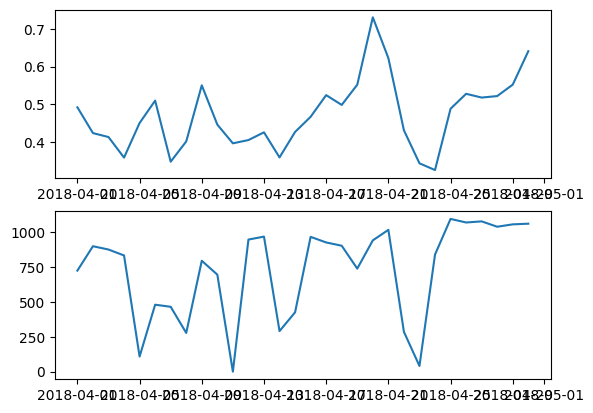

24/09/07 18:35:23 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 1075421 ms exceeds timeout 120000 ms
24/09/07 18:35:23 WARN SparkContext: Killing executors is not supported by current scheduler.
24/09/07 18:35:26 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$

In [265]:
# fig,axes = plt.subplots(figsize=(6, 6), ncols=2, nrows=1,layout="compressed")
plt.subplot(2,1,1)
plt.plot(december_2018_data["Date"],december_2018_data["CO"])
plt.subplot(2,1,2)
plt.plot(december_2018_data["Date"],december_2018_data["Rented Bike Count"])

In [112]:
test["Date"][8759]

'01/12/2017'

In [113]:
i = 0
while i < len(test):
    decompose_temp = test["Date"][i].split("/")
    test.loc[i,"Date"] = decompose_temp[2]+ '-' + decompose_temp[1] + '-' + decompose_temp[0]
    i += 1

In [114]:
Seoul_YMD =  df_pyspark_pollution.withColumn("Measurement date", substring(col("Measurement date"), 1, 10)).withColumn("Address", trim(split(col("Address"), ",").getItem(2)))


,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6,39,1,2000,-17.7,0,0,0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6,36,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0,0,0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0,0,0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0,0,0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1,1859,-9.8,0,0,0,Autumn,No Holiday,Yes


+----------------+
|Measurement date|
+----------------+
|2017-01-01 00:00|
|2017-01-01 01:00|
|2017-01-01 02:00|
|2017-01-01 03:00|
|2017-01-01 04:00|
|2017-01-01 05:00|
|2017-01-01 06:00|
|2017-01-01 07:00|
|2017-01-01 08:00|
|2017-01-01 09:00|
|2017-01-01 10:00|
|2017-01-01 11:00|
|2017-01-01 12:00|
|2017-01-01 13:00|
|2017-01-01 14:00|
|2017-01-01 15:00|
|2017-01-01 16:00|
|2017-01-01 17:00|
|2017-01-01 18:00|
|2017-01-01 19:00|
+----------------+
only showing top 20 rows



In [102]:
test_decompose = test["Date"][1].split("/")
test_decompose

['2017-12-01']

In [70]:
test_decompose[0], test_decompose[2] = test_decompose[2] ,test_decompose[0]

In [72]:
test_decompose[0]+ '-' + test_decompose[1] + '-' + test_decompose[2]

'2017-12-01'

In [73]:
test["Date"][1] = test_decompose[0]+ '-' + test_decompose[1] + '-' + test_decompose[2]

In [74]:
test

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6,39,1,2000,-17.7,0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6,36,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0,0,0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0,0,0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0,0,0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1,1859,-9.8,0,0,0,Autumn,No Holiday,Yes


In [69]:
# df_pyspark_pollution.show()
Seoul_YMD =  df_pyspark_pollution.withColumn("Measurement date", substring(col("Measurement date"), 1, 10)).withColumn("Address", trim(split(col("Address"), ",").getItem(2)))


+----------------+
|Measurement date|
+----------------+
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-01      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-02      |
|2017-01-03      |
|2017-01-03 

In [ ]:
spark.stop()
spark = SparkSession.builder \
    .appName("example") \
    .config("spark.driver.bindAddress", "127.0.0.1") \
    .config("spark.port.maxRetries", "50") \
    .getOrCreate()

In [ ]:
spark

In [ ]:
import os 
os.getcwd()
os.listdir('dags/AirPollutionSeoul')
dataset_path = 'dags/AirPollutionSeoul/Measurement_summary.csv'

In [ ]:
df_pyspark = spark.read.option('header','true').csv('dags/AirPollutionSeoul/Measurement_summary.csv')

In [ ]:
df_pyspark.show()

In [ ]:
type(df_pyspark)

In [ ]:
df_pyspark.printSchema()

Another simple ways without using option

In [ ]:
df_pyspark = spark.read.csv(dataset_path,header=True)
df_pyspark.show()
df_pyspark.printSchema()

In [ ]:
df_pyspark.select(['Measurement date','Station code']).show()

SyntaxError: invalid syntax (277003214.py, line 1)

In [ ]:
df_pyspark.dtypes()

In [ ]:
df_pyspark.dtypes

Adding and drop column

In [ ]:
df_pyspark = df_pyspark.withColumn('ExtreamS02',df_pyspark['SO2']+'0.004')
df_pyspark.show()

In [ ]:
df_pyspark.show()

In [ ]:
# drop column
df_pyspark.drop("ExtreamS02").show()


In [ ]:
df_pyspark = df_pyspark.withColumnRenamed("PM2.5","PM25")
df_pyspark.show()

In [ ]:
df_pyspark.describe().show()

# PySpark Handling Missing Values ##


<li>Dropping Columns</li>
<li>Dropping Rows</li>
<li>Various Parameter in Dropping functionalities</li>
<li>Handelling with missing values by Mean/Median/Mode</li>

In [ ]:
df_pyspark.na.drop(how="all")
#drop just only when all of column is null
df_pyspark.na.drop(how="any",thresh=2)
#drop just only when there is values 2 
df_pyspark.na.drop(how="any",subset=["PM25"]).show()


In [ ]:
from pyspark.sql.functions import isnan, when, count, col


In [ ]:
df_pyspark.select([count(when(isnan(c), c)).alias(c) for c in df_pyspark.columns]).show()


In [ ]:
 ### filling the missing value
## this is how we fill the missing value by select particular columns
df_pyspark.na.fill('Missing vaue',["Address","SO2"]).show()

## Fillter Operation (SQL)
<li> Filter operations</li>
<li> &,|,==</li>
<li> ~ </li>


In [ ]:
df_pyspark.filter("PM25 <= 50").select(["Address","Measurement date"]).show()

In [ ]:
# & Operator
df_pyspark.filter( (df_pyspark["PM25"]<=50) & (df_pyspark["PM10"]>=90))\
    .select(["PM25","PM10"]).show()

In [ ]:
df_pyspark.filter(~(df_pyspark["PM25"]<= 50)).select("PM25").show()
# this is nothing other than inverse fillter

## Group By and Aggregate Functions

In [ ]:
from pyspark.sql.types import IntegerType,BooleanType,DateType


In [ ]:
spark = SparkSession.builder.appName('test').getOrCreate()


In [ ]:
# df_pyspark = spark.read.option('header','true').csv('dags/AirPollutionSeoul/Measurement_summary.csv')
df_pyspark = spark.read.csv(
    path = "dags/AirPollutionSeoul/Measurement_summary.csv",
    header = True,
    )
df_pyspark = df_pyspark.withColumnRenamed("PM2.5","PM25")


In [ ]:
df_pyspark.select["SO2","NO2","O3","CO","PM10","PM25"].show()

In [ ]:
df_pyspark = df_pyspark.withColumn("PM25",df_pyspark["PM25"].cast('float').alias("PM25")
)
df_pyspark = df_pyspark.withColumn("PM10",df_pyspark["PM10"].cast('float').alias("PM10")
)
df_pyspark = df_pyspark.withColumn("SO2",df_pyspark["SO2"].cast('float').alias("SO2")
)
df_pyspark = df_pyspark.withColumn("CO",df_pyspark["CO"].cast('float').alias("CO")
)




In [ ]:
df_pyspark.printSchema()

In [ ]:
df_stat = df_pyspark.summary().cache()
df_stat.show()

In [ ]:
float(df_stat.collect()[1]["PM25"])+(3*float(df_stat.collect()[2]["PM25"]))



In [ ]:
3*df_stat.collect()[2]["PM25"]

In [ ]:
df_pyspark.agg({"PM25":'max'})

In [ ]:
df_pyspark.groupBy("Address").max()

In [ ]:
df_pyspark_test =df_pyspark.select(["SO2","PM25"])
df_pyspark_test.show()

In [ ]:
from pyspark.ml.feature import VectorAssembler


assembler =  VectorAssembler(inputCols=["SO2","CO","PM10"],outputCol="features", handleInvalid="keep")

In [ ]:
output.summary().show()

In [ ]:
output = assembler.transform(df_pyspark).select(["SO2","CO","PM10","PM25","features"])
output = output.select(["PM25","features"])
output.show()
from pyspark.ml.regression import LinearRegression
train_data, test_data = output.randomSplit([0.75,0.25])
model = LinearRegression(featuresCol="features",labelCol="PM25")
model = model.fit(output)


In [ ]:
a, b = output.randomSplit([0.75, 0.25])  # Adding a seed for reproducibility


In [ ]:
a.show()

In [ ]:
from pyspark.ml.regression import LinearRegression
train_data, test_data = output.randomSplit([0.75,0.25])
model = LinearRegression(featuresCol="features",labelCol="PM25")
model = model.fit(output)

In [ ]:
import pyspark.pandas as ps

In [ ]:
df_pandas =df_pyspark.pandas_api()
df_pandas["PM25"].hist



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
num = df_pandas["SO2"][:].to_numpy()


In [ ]:
sns.histplot(num)
plt.xlim([0,1])

In [ ]:
df_pandas["PM25"][:].to_numpy()

In [ ]:
predict = model.evaluate(test_data)
predict.predictions.collect()[-1]

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

# Create sample data
data = [
    (0.004, 1.2, 73.0, 57.0),
    (0.004, 1.2, 71.0, 5.0),
    (0.004, 1.2, 70.0, 59.0),
    (0.004, 1.2, 70.0, 58.0),
    (0.003, 1.2, 69.0, 61.0)
]
columns = ['SO2', 'CO', 'PM10', 'PM25']

# Create DataFrame
df_pyspark = spark.createDataFrame(data, columns)

# Assemble features
assembler = VectorAssembler(
    inputCols=['SO2', 'CO', 'PM10'],
    outputCol='features'
)
output = assembler.transform(df_pyspark)

# Select relevant columns
finalized = output.select(["SO2", "CO", "PM10", "PM25", "features"])

# Show the DataFrame
finalized.show(truncate=False)

# Perform random split
a, b = finalized.randomSplit([0.75, 0.25], seed=42)

a.show()

In [ ]:
output.show(truncate=False)

In [ ]:
finalized.show()


In [ ]:
a, b = finalized.randomSplit([0.75, 0.25], seed=42)
a.show()

In [ ]:
df=df_pyspark.select(columns)

In [ ]:
def _sqlspark_data():
    from pyspark.sql.functions import col, split, trim, substring 
    spark = SparkSession.builder.appName('practise').getOrCreate() 
    # df_pyspark = spark.read.option('header','true').csv('dags/AirPollutionSeoul/Measurement_summary.csv')
    df_pyspark = spark.read.csv(
    path = "./AirPollutionSeoul/Measurement_summary.csv",
    header = True,
    )
    df_pyspark = df_pyspark.withColumnRenamed("PM2.5","PM25")
    columns_to_cast = ["PM25", "PM10", "SO2", "CO", "NO2", "O3"]

    for col_name in columns_to_cast:
        df_pyspark = df_pyspark.withColumn(col_name, df_pyspark[col_name].cast('float'))

    df_stat = df_pyspark.summary().cache()
    pm25_cutoff_max = float(df_stat.collect()[1]["PM25"])+(2*float(df_stat.collect()[2]["PM25"]))
    pm10_cutoff_max = float(df_stat.collect()[1]["PM10"])+(2*float(df_stat.collect()[2]["PM10"]))
    so2_cutoff_max  = float(df_stat.collect()[1]["SO2"])+(2*float(df_stat.collect()[2]["SO2"]))
    co_cutoff_max   = float(df_stat.collect()[1]["CO"])+(2*float(df_stat.collect()[2]["CO"]))
    no2_cutoff_max  = float(df_stat.collect()[1]["NO2"])+(2*float(df_stat.collect()[2]["NO2"]))
    o3_cutoff_max   = float(df_stat.collect()[1]["O3"])+(2*float(df_stat.collect()[2]["O3"]))

    pm25_cutoff_min = float(df_stat.collect()[4]["PM25"])/2
    pm10_cutoff_min = float(df_stat.collect()[4]["PM10"])/2
    so2_cutoff_min = float(df_stat.collect()[4]["SO2"])/2
    co_cutoff_min  = float(df_stat.collect()[4]["CO"])/2
    no2_cutoff_min  = float(df_stat.collect()[4]["NO2"])/2
    o3_cutoff_min  = float(df_stat.collect()[4]["O3"])/2
    

    df_pyspark = df_pyspark.filter((df_pyspark["PM25"] >= pm25_cutoff_min )   &   (df_pyspark["PM25"] < pm25_cutoff_max)    &
                   (df_pyspark["PM10"] >= pm10_cutoff_min)      &   (df_pyspark["PM10"] < pm10_cutoff_max ) &
                   (df_pyspark["SO2"]>= so2_cutoff_min)        &   (df_pyspark["SO2"] < so2_cutoff_max )   &
                   (df_pyspark["NO2"]>= no2_cutoff_min)         &   (df_pyspark["NO2"] < no2_cutoff_max )  &
                   (df_pyspark["O3"]>=  o3_cutoff_min)          &   (df_pyspark["O3"] < o3_cutoff_max )     &
                   (df_pyspark["CO"]>=  co_cutoff_min)          &   (df_pyspark["CO"] < co_cutoff_max ) )
    

    df_pyspark =  df_pyspark.withColumn("Measurement date", substring(col("Measurement date"), 1, 4))
    df_pyspark =  df_pyspark.withColumn("Address", trim(split(col("Address"), ",").getItem(2)))

    df_pyspark.write.format("csv").option("header", "true").mode("overwrite").save("./Measurement_summary_1")



In [ ]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('practise').getOrCreate() 

df_pyspark_read = spark.read.format("csv").option("header", "true").load("./Measurement_summary_1")

In [ ]:
df_pyspark_read.withColumn("Measurement date",col("Measurement date")).show()

In [ ]:
df_pyspark_read.filter(df_pyspark_read["Measurement date"] == 2017).show()
df_pyspark_read.filter(df_pyspark_read["Measurement date"] == 2018).show()
S2019 = df_pyspark_read.filter(df_pyspark_read["Measurement date"] == 2019)

In [ ]:
df_pyspark_read.show()

In [ ]:
df_pyspark_read = spark.read.format("csv").option("header", "true").load("./S2019")
df_pyspark_read.show()

In [ ]:
S2019.write.format("csv").option("header", "true").mode("overwrite").save("./S2019")


In [ ]:
from pyspark.sql.functions import col, split, trim, substring


In [ ]:
Seoulmod["Address"]=Seoulmod["Address"].str.split(',').str[2].str.strip()


In [ ]:
df_pyspark_read = df_pyspark_read.withColumn("Measurement date", substring(col("Measurement date"), 1, 4))
df_pyspark_read = df_pyspark_read.withColumn("Address", trim(split(col("Address"), ",").getItem(2)))
df_pyspark_read.show()



In [ ]:
df_pyspark_read.select("Measurement date").str

In [ ]:
df_pyspark=_sqlspark_data()
df_pyspark.show()

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

assembler =  VectorAssembler(inputCols=["SO2","CO","PM10","NO2"],outputCol="features", handleInvalid="keep")
output = assembler.transform(df_pyspark).select(["PM25","features"])
output = output.select(["PM25","features"])
train_data, test_data = output.randomSplit([0.75,0.25],seed=1)
train_data.cache()
test_data.cache()
model = LinearRegression(featuresCol="features",labelCol="PM25")
model = model.fit(output)

In [ ]:
trainingSummary = model.summary
trainingSummary.r2

In [ ]:
predict = model.evaluate(test_data)
predict.predictions.collect()

In [ ]:
# df_pyspark.filter("PM25 <= 0").select(["PM25"]).show()
# df_pyspark.filter(~(df_pyspark["SO2"] <= 0)).select(["SO2"]).show()
df_pyspark.filter((df_pyspark["PM25"] > 0 ) &
                   (df_pyspark["PM10"] > 0 )& 
                   (df_pyspark["CO"]> 0)).show()

In [ ]:
Seoulmod["Measurement date"]=Seoulmod["Measurement date"].str.slice(0,4)
Seoulmod["Address"]=Seoulmod["Address"].str.split(',').str[2].str.strip()

Seoulall =Seoulmod.drop(["Measurement date"],axis=1).groupby('Address').mean().reset_index()
Seoul2017 = Seoulmod[Seoulmod["Measurement date"]=="2017"].drop("Measurement date",axis=1)\
    .groupby(["Station code","Address","Latitude","Longitude"]).mean().reset_index()
Seoul2018 = Seoulmod[Seoulmod["Measurement date"]=="2018"].drop("Measurement date",axis=1)\
    .groupby(["Station code","Address","Latitude","Longitude"]).mean().reset_index()
Seoul2019 = Seoulmod[Seoulmod["Measurement date"]=="2019"].drop("Measurement date",axis=1)\
    .groupby(["Station code","Address","Latitude","Longitude"]).mean().reset_index()


In [ ]:
def _geomerge_plot() :
        import geopandas as gpd
        import pandas as pd
        import matplotlib.pyplot as plt
        from pyspark.sql import SparkSession 
        import os

        spark = SparkSession.builder.appName('spark').getOrCreate() 

        # Seoulall = spark.read.format("csv").option("header", "true").load("/Users/art/Airflow/dags/AirPollutionSeoul/all")
        Seoul2017 = spark.read.format("csv").option("header", "true").load("/Users/art/Airflow/dags/AirPollutionSeoul/2017")
        Seoul2018 = spark.read.format("csv").option("header", "true").load("/Users/art/Airflow/dags/AirPollutionSeoul/2018")
        Seoul2019 = spark.read.format("csv").option("header", "true").load("/Users/art/Airflow/dags/AirPollutionSeoul/2019")
        tempSeoulGep= gpd.read_file("/Users/art/Airflow/plugins/seoul_municipalities_geo.json")

        Seoul2017_pd = Seoul2017.toPandas()
        Seoul2018_pd = Seoul2018.toPandas()
        Seoul2019_pd = Seoul2019.toPandas()
        # Seoulall_pd = Seoulall.toPandas()


        SeoulGeo_pollution2017 = tempSeoulGep.merge(Seoul2017_pd, left_on='SIG_ENG_NM', right_on='Address').drop("Address",axis=1)
        SeoulGeo_pollution2018 = tempSeoulGep.merge(Seoul2018_pd, left_on='SIG_ENG_NM', right_on='Address').drop("Address",axis=1)
        SeoulGeo_pollution2019 = tempSeoulGep.merge(Seoul2019_pd, left_on='SIG_ENG_NM', right_on='Address').drop("Address",axis=1)


        f, axes = plt.subplots(figsize=(1, 2), ncols=2, nrows=1,layout="compressed")
        SeoulGeo_pollution2017.plot(ax=axes[0], column='PM25', cmap='OrRd', legend=True)
        SeoulGeo_pollution2017.plot(ax=axes[1], column='PM10', cmap='OrRd', legend=True)
        # SeoulGeo_pollution2017.plot(ax=axes[2][0], column='CO', cmap='OrRd', legend=True,vmin = mindata["CO"],vmax = maxdata["CO"])
        # SeoulGeo_pollution2017.plot(ax=axes[3][0], column='SO2', cmap='OrRd', legend=True,vmin = mindata["SO2"],vmax = maxdata["SO2"])
        # SeoulGeo_pollution2018.plot(ax=axes[0][1], column='PM25 ', cmap='OrRd', legend=True,vmin = mindata["PM25"],vmax = maxdata["PM25"])
        # SeoulGeo_pollution2018.plot(ax=axes[1][1], column='PM10', cmap='OrRd', legend=True,vmin = mindata["PM10"],vmax = maxdata["PM10"])
        # SeoulGeo_pollution2018.plot(ax=axes[2][1], column='CO', cmap='OrRd', legend=True,vmin = mindata["CO"],vmax = maxdata["CO"])
        # SeoulGeo_pollution2018.plot(ax=axes[3][1], column='SO2', cmap='OrRd', legend=True,vmin = mindata["SO2"],vmax = maxdata["SO2"])
        # SeoulGeo_pollution2019.plot(ax=axes[0][2], column='PM25', cmap='OrRd', legend=True,vmin = mindata["PM25"],vmax = maxdata["PM25"])
        # SeoulGeo_pollution2019.plot(ax=axes[1][2], column='PM10', cmap='OrRd', legend=True,vmin = mindata["PM10"],vmax = maxdata["PM10"])
        # SeoulGeo_pollution2019.plot(ax=axes[2][2], column='CO', cmap='OrRd', legend=True,vmin = mindata["CO"],vmax = maxdata["CO"])
        # SeoulGeo_pollution2019.plot(ax=axes[3][2], column='SO2', cmap='OrRd', legend=True,vmin = mindata["SO2"],vmax = maxdata["SO2"])

        # for i, ax_row in enumerate(axes):
        #     for j, ax in enumerate(ax_row):
        #         ax.set_xticks([])
        #         ax.set_yticks([])
        #         if i ==0:
        #             if j == 0:
        #                 ax.set_title("2017" , fontsize=12)
        #             elif j==1:
        #                 ax.set_title("2018" , fontsize=12)
        #             else:
        #                 ax.set_title("2019" , fontsize=12)
        #         else:
        #             ax.set_title(" ")
        # plt.savefig("./geo_map.png")

def _sqlspark_data():
    spark = SparkSession.builder.appName('practise').getOrCreate() 
    # df_pyspark = spark.read.option('header','true').csv('dags/AirPollutionSeoul/Measurement_summary.csv')
    df_pyspark = spark.read.csv(
    path = "./AirPollutionSeoul/Measurement_summary.csv",
    header = True,
    )
    df_pyspark = df_pyspark.withColumnRenamed("PM2.5","PM25")
    columns_to_cast = ["PM25", "PM10", "SO2", "CO", "NO2", "O3"]

    for col_name in columns_to_cast:
        df_pyspark = df_pyspark.withColumn(col_name, df_pyspark[col_name].cast('float'))

    df_stat = df_pyspark.summary().cache()
    pm25_cutoff_max = float(df_stat.collect()[1]["PM25"])+(2*float(df_stat.collect()[2]["PM25"]))
    pm10_cutoff_max = float(df_stat.collect()[1]["PM10"])+(2*float(df_stat.collect()[2]["PM10"]))
    so2_cutoff_max  = float(df_stat.collect()[1]["SO2"])+(2*float(df_stat.collect()[2]["SO2"]))
    co_cutoff_max   = float(df_stat.collect()[1]["CO"])+(2*float(df_stat.collect()[2]["CO"]))
    no2_cutoff_max  = float(df_stat.collect()[1]["NO2"])+(2*float(df_stat.collect()[2]["NO2"]))
    o3_cutoff_max   = float(df_stat.collect()[1]["O3"])+(2*float(df_stat.collect()[2]["O3"]))

    pm25_cutoff_min = float(df_stat.collect()[4]["PM25"])/2
    pm10_cutoff_min = float(df_stat.collect()[4]["PM10"])/2
    so2_cutoff_min = float(df_stat.collect()[4]["SO2"])/2
    co_cutoff_min  = float(df_stat.collect()[4]["CO"])/2
    no2_cutoff_min  = float(df_stat.collect()[4]["NO2"])/2
    o3_cutoff_min  = float(df_stat.collect()[4]["O3"])/2
    

    df_pyspark = df_pyspark.filter((df_pyspark["PM25"] >= pm25_cutoff_min )   &   (df_pyspark["PM25"] < pm25_cutoff_max)    &
                   (df_pyspark["PM10"] >= pm10_cutoff_min)      &   (df_pyspark["PM10"] < pm10_cutoff_max ) &
                   (df_pyspark["SO2"]>= so2_cutoff_min)         &   (df_pyspark["SO2"] < so2_cutoff_max )   &
                   (df_pyspark["NO2"]>= no2_cutoff_min)         &   (df_pyspark["NO2"] < no2_cutoff_max )   &
                   (df_pyspark["O3"]>=  o3_cutoff_min)          &   (df_pyspark["O3"] < o3_cutoff_max )     &
                   (df_pyspark["CO"]>=  co_cutoff_min)          &   (df_pyspark["CO"] < co_cutoff_max ) )
    

    df_pyspark =  df_pyspark.withColumn("Measurement date", substring(col("Measurement date"), 1, 4))
    df_pyspark =  df_pyspark.withColumn("Address", trim(split(col("Address"), ",").getItem(2)))
    Seoul2017 = df_pyspark.filter(df_pyspark["Measurement date"] == 2017)
    Seoul2018 = df_pyspark.filter(df_pyspark["Measurement date"] == 2018)
    Seoul2019 = df_pyspark.filter(df_pyspark["Measurement date"] == 2019)

    Seoul2017.write.format("csv").option("header", "true").mode("overwrite").save("2017")
    Seoul2018.write.format("csv").option("header", "true").mode("overwrite").save("2018")
    Seoul2019.write.format("csv").option("header", "true").mode("overwrite").save("2019")
    df_pyspark.write.format("csv").option("header", "true").mode("overwrite").save("all")



In [ ]:
from pyspark.sql import SparkSession 
import os
from pyspark.sql import functions as F

spark = SparkSession.builder.appName('spark').getOrCreate() 

# Seoulall = spark.read.format("csv").option("header", "true").load("all")
Seoul2017 = spark.read.format("csv").option("header", "true").load("/Users/art/Airflow/dags/AirPollutionSeoul/2017")
max_pm25 = Seoul2017.select(F.max("PM25")).collect()[0][0]



In [ ]:
Seoul201"

In [3]:
from pyspark.sql import SparkSession 
spark = SparkSession.builder \
    .appName('spark') \
    .config("spark.driver.bindAddress", "127.0.0.1") \
    .getOrCreate()

24/08/29 16:38:58 WARN SparkContext: Another SparkContext is being constructed (or threw an exception in its constructor). This may indicate an error, since only one SparkContext should be running in this JVM (see SPARK-2243). The other SparkContext was created at:
org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
java.base/jdk.internal.reflect.DirectConstructorHandleAccessor.newInstance(DirectConstructorHandleAccessor.java:62)
java.base/java.lang.reflect.Constructor.newInstanceWithCaller(Constructor.java:502)
java.base/java.lang.reflect.Constructor.newInstance(Constructor.java:486)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServerConnection.waitForCommands(ClientServerConnection.ja

In [3]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import pyspark.pandas as ps
from matplotlib.colors import Normalize

# Initialize Spark session
spark = SparkSession.builder.appName('spark').getOrCreate()

# Load data from CSV files into Spark DataFrames
Seoul_all = spark.read.format("csv").option("header", "true").load("/Users/art/Airflow/dags/AirPollutionSeoul/Seoul_MY")
Seoul2017 = spark.read.format("csv").option("header", "true").load("/Users/art/Airflow/dags/AirPollutionSeoul/2017")
Seoul2018 = spark.read.format("csv").option("header", "true").load("/Users/art/Airflow/dags/AirPollutionSeoul/2018")
Seoul2019 = spark.read.format("csv").option("header", "true").load("/Users/art/Airflow/dags/AirPollutionSeoul/2019")


pollution_columns = ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM25']
for col in pollution_columns:
    Seoul_all = Seoul_all.withColumn(col, Seoul_all[col].cast('float'))
    Seoul2017 = Seoul2017.withColumn(col, Seoul2017[col].cast('float'))
    Seoul2018 = Seoul2018.withColumn(col, Seoul2018[col].cast('float'))
    Seoul2019 = Seoul2019.withColumn(col, Seoul2019[col].cast('float'))
# Group by 'Address' and calculate the average for each pollution column

# # Load GeoJSON data into a GeoDataFrame
tempSeoulGep = gpd.read_file("/Users/art/Airflow/plugins/seoul_municipalities_geo.json")


Seoul_all = Seoul_all.toPandas()
Seoul2017 = Seoul2017.toPandas()
Seoul2018 = Seoul2018.toPandas()
Seoul2019 = Seoul2019.toPandas()


Seoul_all =Seoul_all.drop(["Measurement date","Station code" , "Station code","Address","Latitude","Longitude"],axis=1)
Seoul2017 = Seoul2017[Seoul2017["Measurement date"]=="2017"].drop("Measurement date",axis=1)\
    .groupby(["Station code","Address","Latitude","Longitude"]).mean().reset_index()
Seoul2018 = Seoul2018[Seoul2018["Measurement date"]=="2018"].drop("Measurement date",axis=1)\
    .groupby(["Station code","Address","Latitude","Longitude"]).mean().reset_index()
Seoul2019 = Seoul2019[Seoul2019["Measurement date"]=="2019"].drop("Measurement date",axis=1)\
    .groupby(["Station code","Address","Latitude","Longitude"]).mean().reset_index()
maxdata=Seoul_all.iloc[:,0:].max()
mindata=Seoul_all.iloc[:,0:].min()

SeoulGeo_pollution2017 = tempSeoulGep.merge(Seoul2017, left_on='SIG_ENG_NM', right_on='Address').drop("Address", axis=1)
SeoulGeo_pollution2018 = tempSeoulGep.merge(Seoul2018, left_on='SIG_ENG_NM', right_on='Address').drop("Address", axis=1)
SeoulGeo_pollution2019 = tempSeoulGep.merge(Seoul2019, left_on='SIG_ENG_NM', right_on='Address').drop("Address", axis=1)



Pollution_key = ["PM25", "PM10","SO2","CO"]
f, axes = plt.subplots(figsize=(5, 15), ncols = 3, nrows = 4,layout="compressed")

for i,keys in enumerate(Pollution_key): 
    norm = Normalize(vmin=vmin, vmax=vmax)
    SeoulGeo_pollution2017.plot(ax=axes[i][0], column= keys, cmap='OrRd', legend=True, 
                                legend_kwds={"label": "", "orientation": "horizontal"})
    SeoulGeo_pollution2018.plot(ax=axes[i][1], column=keys, cmap='OrRd', legend=True, 
                                legend_kwds={"label": keys, "orientation": "horizontal"})
    SeoulGeo_pollution2019.plot(ax=axes[i][2], column= keys , cmap='OrRd', legend=True, 
                                legend_kwds={"label": "", "orientation": "horizontal"} ,)

for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        ax.set_xticks([])
        ax.set_yticks([])
        if i ==0:
            if j == 0:
                ax.set_title("2017" , fontsize=12)
            elif j==1:
                ax.set_title("2018" , fontsize=12)
            else:
                ax.set_title("2019" , fontsize=12)
        else:
            ax.set_title(" ")


24/08/29 18:05:12 WARN SparkContext: Another SparkContext is being constructed (or threw an exception in its constructor). This may indicate an error, since only one SparkContext should be running in this JVM (see SPARK-2243). The other SparkContext was created at:
org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
java.base/jdk.internal.reflect.DirectConstructorHandleAccessor.newInstance(DirectConstructorHandleAccessor.java:62)
java.base/java.lang.reflect.Constructor.newInstanceWithCaller(Constructor.java:502)
java.base/java.lang.reflect.Constructor.newInstance(Constructor.java:486)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.ClientServerConnection.waitForCommands(ClientServerConnection.ja

Py4JJavaError: An error occurred while calling None.org.apache.spark.api.java.JavaSparkContext.
: java.net.BindException: Can't assign requested address: Service 'sparkDriver' failed after 16 retries (on a random free port)! Consider explicitly setting the appropriate binding address for the service 'sparkDriver' (for example spark.driver.bindAddress for SparkDriver) to the correct binding address.
	at java.base/sun.nio.ch.Net.bind0(Native Method)
	at java.base/sun.nio.ch.Net.bind(Net.java:565)
	at java.base/sun.nio.ch.ServerSocketChannelImpl.netBind(ServerSocketChannelImpl.java:344)
	at java.base/sun.nio.ch.ServerSocketChannelImpl.bind(ServerSocketChannelImpl.java:301)
	at io.netty.channel.socket.nio.NioServerSocketChannel.doBind(NioServerSocketChannel.java:141)
	at io.netty.channel.AbstractChannel$AbstractUnsafe.bind(AbstractChannel.java:562)
	at io.netty.channel.DefaultChannelPipeline$HeadContext.bind(DefaultChannelPipeline.java:1334)
	at io.netty.channel.AbstractChannelHandlerContext.invokeBind(AbstractChannelHandlerContext.java:600)
	at io.netty.channel.AbstractChannelHandlerContext.bind(AbstractChannelHandlerContext.java:579)
	at io.netty.channel.DefaultChannelPipeline.bind(DefaultChannelPipeline.java:973)
	at io.netty.channel.AbstractChannel.bind(AbstractChannel.java:260)
	at io.netty.bootstrap.AbstractBootstrap$2.run(AbstractBootstrap.java:356)
	at io.netty.util.concurrent.AbstractEventExecutor.runTask(AbstractEventExecutor.java:174)
	at io.netty.util.concurrent.AbstractEventExecutor.safeExecute(AbstractEventExecutor.java:167)
	at io.netty.util.concurrent.SingleThreadEventExecutor.runAllTasks(SingleThreadEventExecutor.java:470)
	at io.netty.channel.nio.NioEventLoop.run(NioEventLoop.java:569)
	at io.netty.util.concurrent.SingleThreadEventExecutor$4.run(SingleThreadEventExecutor.java:997)
	at io.netty.util.internal.ThreadExecutorMap$2.run(ThreadExecutorMap.java:74)
	at io.netty.util.concurrent.FastThreadLocalRunnable.run(FastThreadLocalRunnable.java:30)
	at java.base/java.lang.Thread.run(Thread.java:1570)


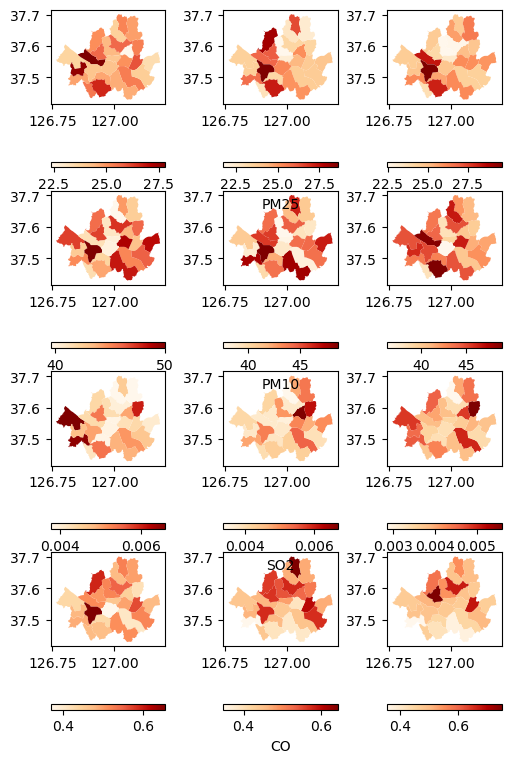

In [100]:
from matplotlib.colors import Normalize

Pollution_key = ["PM25", "PM10","SO2","CO"]
f, axes = plt.subplots(figsize=(5, 15), ncols = 3, nrows = 4,layout="compressed")

for i,keys in enumerate(Pollution_key): 
    vmin = SeoulGeo_pollution2017[keys].min()
    vmax = SeoulGeo_pollution2017[keys].max()
    norm = Normalize(vmin=vmin, vmax=vmax)
    SeoulGeo_pollution2017.plot(ax=axes[i][0], column= keys, cmap='OrRd', legend=True, 
                                legend_kwds={"label": "", "orientation": "horizontal"})
    SeoulGeo_pollution2018.plot(ax=axes[i][1], column=keys, cmap='OrRd', legend=True, 
                                legend_kwds={"label": keys, "orientation": "horizontal"})
    SeoulGeo_pollution2019.plot(ax=axes[i][2], column= keys , cmap='OrRd', legend=True, 
                                legend_kwds={"label": "", "orientation": "horizontal"})


In [ ]:
Seoul2017_pd = grouped_df.toPandas()
SeoulGeo_pollution2017_spark = tempSeoulGep.merge(Seoul2017_pd, left_on='SIG_ENG_NM', right_on='Address').drop("Address", axis=1)
SeoulGeo_pollution2017_spark


In [101]:
Seoul_all

,SO2,NO2,O3,CO,PM10,PM25
0,0.011,0.044,0.035,0.7,76.0,49.0
1,0.014,0.050,0.034,0.7,80.0,52.0
2,0.011,0.058,0.034,0.6,71.0,47.0
3,0.013,0.077,0.007,0.8,73.0,49.0
4,0.014,0.071,0.004,0.9,66.0,48.0
...,...,...,...,...,...,...
473007,0.003,0.028,0.013,0.5,23.0,17.0
473008,0.003,0.025,0.015,0.4,25.0,19.0
473009,0.003,0.023,0.015,0.4,24.0,17.0
473010,0.003,0.040,0.004,0.5,25.0,18.0


In [43]:
from pyspark.sql.functions import avg

# Convert the columns to numeric types (if they are read as strings)
pollution_columns = ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM25']
for col in pollution_columns:
    Seoul2017 = Seoul2017.withColumn(col, Seoul2017[col].cast('float'))

# Group by 'Address' and calculate the average for each pollution column
grouped_df = Seoul2017.groupBy('Address').agg(
    avg('SO2').alias('avg_SO2'),
    avg('NO2').alias('avg_NO2'),
    avg('O3').alias('avg_O3'),
    avg('CO').alias('avg_CO'),
    avg('PM10').alias('avg_PM10'),
    avg('PM25').alias('avg_PM25')
)

In [ ]:
Seoul2017_pd = grouped_df.toPandas()
SeoulGeo_pollution2017_spark = tempSeoulGep.merge(Seoul2017_pd, left_on='SIG_ENG_NM', right_on='Address').drop("Address", axis=1)
SeoulGeo_pollution2017_spark


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pyspark.pandas 

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

Seoul = pd.read_csv("/Users/art/Airflow/dags/AirPollutionSeoul/Measurement_summary.csv")
Seoulmod = Seoul.copy()
Seoulmod["Measurement date"]=Seoulmod["Measurement date"].str.slice(0,4)
Seoulmod["Address"]=Seoulmod["Address"].str.split(',').str[2].str.strip()

Seoulall =Seoulmod.drop(["Measurement date"],axis=1).groupby('Address').mean().reset_index()
Seoul2017 = Seoulmod[Seoulmod["Measurement date"]=="2017"].drop("Measurement date",axis=1)\
    .groupby(["Station code","Address","Latitude","Longitude"]).mean().reset_index()
Seoul2018 = Seoulmod[Seoulmod["Measurement date"]=="2018"].drop("Measurement date",axis=1)\
    .groupby(["Station code","Address","Latitude","Longitude"]).mean().reset_index()
Seoul2019 = Seoulmod[Seoulmod["Measurement date"]=="2019"].drop("Measurement date",axis=1)\
    .groupby(["Station code","Address","Latitude","Longitude"]).mean().reset_index()

tempSeoulGep=gpd.read_file("/Users/art/Airflow/plugins/seoul_municipalities_geo.json")
SeoulGeo_pollution2017 = tempSeoulGep.merge(Seoul2017, left_on='SIG_ENG_NM', right_on='Address').drop("Address",axis=1)
SeoulGeo_pollution2018 = tempSeoulGep.merge(Seoul2018, left_on='SIG_ENG_NM', right_on='Address').drop("Address",axis=1)
SeoulGeo_pollution2019 = tempSeoulGep.merge(Seoul2019, left_on='SIG_ENG_NM', right_on='Address').drop("Address",axis=1)
maxdata=Seoulall.iloc[:,1:].max()
mindata=Seoulall.iloc[:,1:].min()

In [ ]:
SeoulGeo_pollution2017_spark.plot(column='avg_PM25', cmap='OrRd', legend=True, legend_kwds={"label": "", "orientation": "horizontal"},vmin = 0,vmax = 50)


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName('spark').getOrCreate() 

Seoul2017 = spark.read.format("csv").option("header", "true").load("2017")
Seoul2018 = spark.read.format("csv").option("header", "true").load("2018")
Seoul2019 = spark.read.format("csv").option("header", "true").load("2019")
tempSeoulGep = spark.read.json("../plugins/seoul_municipalities_geo.json")

SeoulGeo_pollution2017 = tempSeoulGep.join(Seoul2017, tempSeoulGep['SIG_ENG_NM']== Seoul2017["Address"], "inner").drop("Address")
# SeoulGeo_pollution2018 = tempSeoulGep.join(Seoul2018, tempSeoulGep['SIG_ENG_NM']==Seoul2018["Address"], "inner").drop("Address")
# SeoulGeo_pollution2019 = tempSeoulGep.join(Seoul2019, tempSeoulGep['SIG_ENG_NM']== Seoul2019["Address"], "inner").drop("Address")

In [ ]:
Seoul2017 = spark.read.format("csv").option("header", "true").load("2017").pandas_api()
tempSeoulGep=gpd.read_file("../plugins/seoul_municipalities_geo.json")

# SeoulGeo_pollution2017 = tempSeoulGep.merge(Seoul2017, left_on='SIG_ENG_NM', right_on='Address').drop("Address",axis=1)

In [ ]:
tempSeoulGep.merge(Seoul2017, left_on='SIG_ENG_NM', right_on='Address').drop("Address",axis=1)

In [ ]:
import pyspark.pandas as ps


Seoul2017 = spark.read.format("csv").option("header", "true").load("2017")

In [ ]:
ps.DataFrame(Seoul2017).dtypes

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, split, trim, substring 

spark_1 = SparkSession.builder.appName('test').getOrCreate() 
# Seoul = spark.read.format("csv").option("header", "true").load("/opt/airflow/dags/AirPollutionSeoul/all").drop(["Latitude","Longitude","Station code"])


# Seoul = Seoul.withColumn("M", substring("Measurement date", 6, 2))
# Seoul = Seoul.withColumn("Y", substring("Measurement date", 1, 4))
# Seoul= Seoul.drop("Measurement date")

# pre_plot =  Seoul.drop("Y").groupby(["Address","M"]).mean()
# plot_temp= pre_plot.drop(["Address","M"],axis=1)
# fig1 = plt.figure(figsize=(12,5))
# corr= plot_temp.corr()
# matrix = np.triu(corr)
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(corr,annot=True, mask=matrix, cmap=cmap)
# plt.savefig("/opt/airflow/dags/correlation1.png")

# fig,axes = plt.subplots(figsize=(6, 6), ncols=2, nrows=3,layout="compressed")
# sns.regplot(x="PM2.5",y="PM10",data = plot_temp, ax=axes[0,0],line_kws={"color": "red"})
# sns.residplot(x="PM2.5",y="PM10",data = plot_temp, ax=axes[0,1])
# sns.regplot(x="O3",y="CO",data = plot_temp, ax=axes[1,0],line_kws={"color": "red"})
# sns.residplot(x="O3",y="CO",data = plot_temp, ax=axes[1,1])
# sns.regplot(x="O3",y="SO2",data = plot_temp, ax=axes[2,0],line_kws={"color": "red"})
# sns.residplot(x="O3",y="SO2",data = plot_temp, ax=axes[2,1])
# plt.savefig("/opt/airflow/dags/correlation2.png")


In [ ]:
import os 
os.getcwd()

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, split, trim, substring 

spark = SparkSession.builder.appName('corelation_analysis').getOrCreate() 
Seoul = spark.read.format("csv").option("header", "true").load("./AirPollutionSeoul/Seoul_MY").drop("Latitude","Longitude","Station code")


# Seoul = Seoul.withColumn("M", substring("Measurement date", 5, 2))
# Seoul = Seoul.withColumn("Y", substring("Measurement date", 1, 4))
# Seoul= Seoul.drop("Measurement date")

Seoul_MY =  Seoul.withColumn("Measurement date", substring(col("Measurement date"), 1, 7))
Seoul = Seoul.withColumn("M", substring("Measurement date", 6, 2).cast("int"))
Seoul = Seoul.withColumn("Y", substring("Measurement date", 1, 4).cast("int"))

Seoul.show()

In [ ]:
pre_plot =  Seoul.drop("Y").groupby("Address","M","PM25").mean()
# plot_temp= pre_plot.drop(["Address","M"])
# fig1 = plt.figure(figsize=(12,5))
# corr= plot_temp.corr()
# matrix = np.triu(corr)
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(corr,annot=True, mask=matrix, cmap=cmap)

pre_plot.show()



In [ ]:
from pyspark.sql.functions import col, avg

# List all columns except "Address" and "M"
columns_to_avg = [c for c in Seoul.columns if c not in ["Address", "M"]]

# Create a list of average aggregations for the columns
avg_expressions = [avg(col(c)).alias(f"{c}") for c in columns_to_avg]

# Perform groupBy and aggregation
pre_plot = Seoul.groupBy("Address", "M").agg(*avg_expressions)

In [ ]:
pre_plot

In [ ]:
pre_plot =  Seoul.drop("Y").groupby(["Address","M"]).mean()
plot_temp= pre_plot.drop(["Address","M"],axis=1)
fig1 = plt.figure(figsize=(12,5))
corr= plot_temp.corr()
matrix = np.triu(corr)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,annot=True, mask=matrix, cmap=cmap)
plt.savefig("/opt/airflow/dags/correlation1.png")

fig,axes = plt.subplots(figsize=(6, 6), ncols=2, nrows=3,layout="compressed")
sns.regplot(x="PM2.5",y="PM10",data = plot_temp, ax=axes[0,0],line_kws={"color": "red"})
sns.residplot(x="PM2.5",y="PM10",data = plot_temp, ax=axes[0,1])
sns.regplot(x="O3",y="CO",data = plot_temp, ax=axes[1,0],line_kws={"color": "red"})
sns.residplot(x="O3",y="CO",data = plot_temp, ax=axes[1,1])
sns.regplot(x="O3",y="SO2",data = plot_temp, ax=axes[2,0],line_kws={"color": "red"})
sns.residplot(x="O3",y="SO2",data = plot_temp, ax=axes[2,1])
  

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/users/art/Desktop/data.csv", encoding='ISO-8859-1')


In [ ]:
df["InvoiceDate"] =df["InvoiceDate"].str.slice(3,4)

In [ ]:
test =df.groupby("InvoiceDate").count()

In [ ]:
test

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(test["InvoiceDate"],test["Quantity"])

In [ ]:
plt.plot(test["Quantity"])

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
Seoulmod = pd.read_csv("/Users/art/Airflow/dags/AirPollutionSeoul/Measurement_summary.csv")
Seoulmod["Measurement date"]=Seoulmod["Measurement date"].str.slice(0,7)
Seoulmod["Address"]=Seoulmod["Address"].str.split(',').str[2].str.strip()
Seoulmod = Seoulmod.drop(["Latitude","Longitude","Station code"],axis=1)
Seoulmod.insert(0,"M",Seoulmod["Measurement date"].str.slice(5,7),True)
Seoulmod.insert(1,"Y",Seoulmod["Measurement date"].str.slice(0,4),True)
Seoulmod.drop("Measurement date",axis=1,inplace=True)
pre_plot = Seoulmod.drop(["Y"],axis=1).groupby(["Address","M"],as_index = False).mean()

In [7]:
a = pd.read_csv("/Users/art/Airflow/dags/AirPollutionSeoul/Seoul_MY/part-00000-4c4c62b1-ff6f-4f6f-8c6f-88d468189387-c000.csv")

In [15]:
a["Measurement date"]
a.insert(0,"M",a["Measurement date"].str.slice(5,7),True)
a.insert(1,"Y",a["Measurement date"].str.slice(0,4),True)
a

,M,Y,M,Y,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM25
0,01,2017,01,2017,2017-01,101,Jongno-gu,37.572016,127.005008,0.004,0.045,0.004,1.0,76.0,68.0
1,01,2017,01,2017,2017-01,101,Jongno-gu,37.572016,127.005008,0.004,0.048,0.005,1.0,83.0,74.0
2,01,2017,01,2017,2017-01,101,Jongno-gu,37.572016,127.005008,0.004,0.054,0.005,1.0,93.0,79.0
3,01,2017,01,2017,2017-01,101,Jongno-gu,37.572016,127.005008,0.005,0.050,0.007,1.0,94.0,79.0
4,01,2017,01,2017,2017-01,101,Jongno-gu,37.572016,127.005008,0.006,0.055,0.008,0.9,93.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44257,09,2017,09,2017,2017-09,103,Yongsan-gu,37.540033,127.004850,0.004,0.029,0.019,0.3,20.0,9.0
44258,09,2017,09,2017,2017-09,103,Yongsan-gu,37.540033,127.004850,0.004,0.027,0.023,0.3,19.0,11.0
44259,09,2017,09,2017,2017-09,103,Yongsan-gu,37.540033,127.004850,0.005,0.029,0.025,0.3,26.0,10.0
44260,09,2017,09,2017,2017-09,103,Yongsan-gu,37.540033,127.004850,0.004,0.023,0.032,0.2,18.0,12.0


In [12]:
import pyspark.pandas as ps
from pyspark.sql import SparkSession
# Initialize Spark session
spark = SparkSession.builder \
    .appName('spark') \
    .config("spark.driver.bindAddress", "127.0.0.1") \
    .getOrCreate()
# Load data from CSV files into Spark DataFrames
# Seoul_all = spark.read.format("csv").option("header", "true").load("/Users/art/Airflow/dags/AirPollutionSeoul/Seoul_MY")
# Seoul_all = Seoul_all.toPandas()
# Seoul_all

/Users/art/.julia/conda/3/x86_64/lib/python3.10/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(
24/08/29 18:19:53 WARN SparkContext: Another SparkContext is being constructed (or threw an exception in its constructor). This may indicate an error, since only one SparkContext should be running in this JVM (see SPARK-2243). The other SparkContext was created at:
org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
java.base/jdk.internal.reflect.DirectConstructorHandleAccessor.newInstance(DirectConstructorHandleAccessor.java:62)
java.base/java.lang.reflect.Constructor.newInstanceWithCaller(Constructor.java:502)
java.base/java.lang.reflect.Constructor.newInstance(Con

In [2]:
Seoul_all = spark.read.format("csv").option("header", "true").load("/Users/art/Airflow/dags/AirPollutionSeoul/Seoul_MY").toPandas()

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("a").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/08/29 18:06:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/08/29 18:07:00 WARN Utils: Service 'sparkDriver' could not bind on a random free port. You may check whether configuring an appropriate binding address.
24/08/29 18:07:00 WARN Utils: Service 'sparkDriver' could not bind on a random free port. You may check whether configuring an appropriate binding address.
24/08/29 18:07:00 WARN Utils: Service 'sparkDriver' could not bind on a random free port. You may check whether configuring an appropriate binding address.
24/08/29 18:07:00 WARN Utils: Service 'sparkDriver' could not bind on a random free port. You may check whether configuring an appropriate binding address.
24/08/29 18:07:00 WARN Utils: Service 'sparkDriver' could not bind on a random free port. You may check

Py4JJavaError: An error occurred while calling None.org.apache.spark.api.java.JavaSparkContext.
: java.net.BindException: Can't assign requested address: Service 'sparkDriver' failed after 16 retries (on a random free port)! Consider explicitly setting the appropriate binding address for the service 'sparkDriver' (for example spark.driver.bindAddress for SparkDriver) to the correct binding address.
	at java.base/sun.nio.ch.Net.bind0(Native Method)
	at java.base/sun.nio.ch.Net.bind(Net.java:565)
	at java.base/sun.nio.ch.ServerSocketChannelImpl.netBind(ServerSocketChannelImpl.java:344)
	at java.base/sun.nio.ch.ServerSocketChannelImpl.bind(ServerSocketChannelImpl.java:301)
	at io.netty.channel.socket.nio.NioServerSocketChannel.doBind(NioServerSocketChannel.java:141)
	at io.netty.channel.AbstractChannel$AbstractUnsafe.bind(AbstractChannel.java:562)
	at io.netty.channel.DefaultChannelPipeline$HeadContext.bind(DefaultChannelPipeline.java:1334)
	at io.netty.channel.AbstractChannelHandlerContext.invokeBind(AbstractChannelHandlerContext.java:600)
	at io.netty.channel.AbstractChannelHandlerContext.bind(AbstractChannelHandlerContext.java:579)
	at io.netty.channel.DefaultChannelPipeline.bind(DefaultChannelPipeline.java:973)
	at io.netty.channel.AbstractChannel.bind(AbstractChannel.java:260)
	at io.netty.bootstrap.AbstractBootstrap$2.run(AbstractBootstrap.java:356)
	at io.netty.util.concurrent.AbstractEventExecutor.runTask(AbstractEventExecutor.java:174)
	at io.netty.util.concurrent.AbstractEventExecutor.safeExecute(AbstractEventExecutor.java:167)
	at io.netty.util.concurrent.SingleThreadEventExecutor.runAllTasks(SingleThreadEventExecutor.java:470)
	at io.netty.channel.nio.NioEventLoop.run(NioEventLoop.java:569)
	at io.netty.util.concurrent.SingleThreadEventExecutor$4.run(SingleThreadEventExecutor.java:997)
	at io.netty.util.internal.ThreadExecutorMap$2.run(ThreadExecutorMap.java:74)
	at io.netty.util.concurrent.FastThreadLocalRunnable.run(FastThreadLocalRunnable.java:30)
	at java.base/java.lang.Thread.run(Thread.java:1570)
